# Feature Engineering

1. Feature engineering is a crucial step in the process of preparing data for machine learning models. 
2. It involves creating new features or modifying existing ones to improve the performance of the model. 
3. Feature engineering helps the model better capture patterns and relationships in the data


# Missing Values

Missing values occurs in dataset when some of the informations is not stored for a variable.

## There are three main types of missing data:

### Missing completely at random (MCAR) - Missing data are randomly distributed across the variable and unrelated to other variables.

### Missing at random (MAR) - Missing data are not randomly distributed but they are accounted for by other observed variables.

### Missing not at random (MNAR) - Missing data systematically differ from the observed values.

In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Checking misisng values in a dataset

In [6]:

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

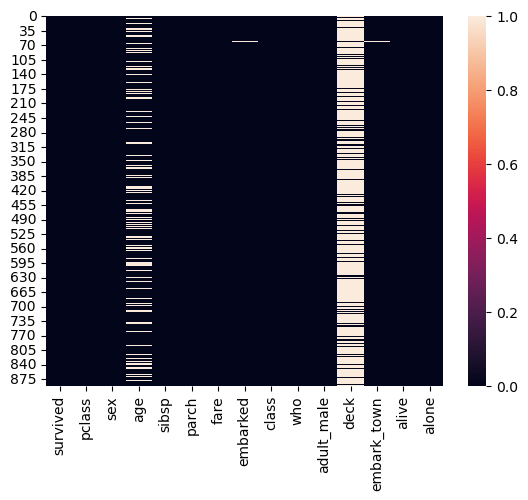

In [7]:
sns.heatmap(df.isnull())

# Handling missing values by deleting rows 

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.shape

(891, 15)

In [11]:
df.dropna().shape

(182, 15)

# Handling missing values by deleting columns 

In [12]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


# Imputation Techniques

# 1. Mean Value Imputation

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

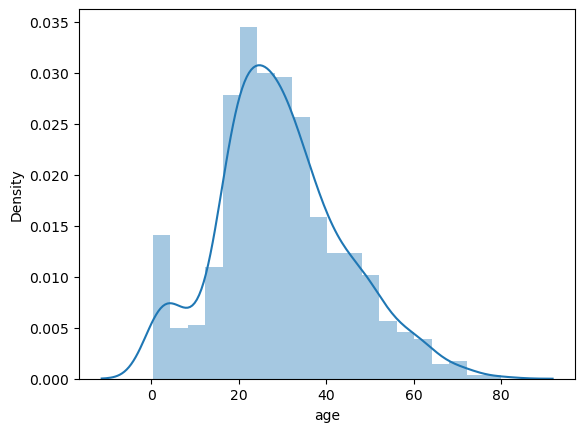

In [14]:
sns.distplot(df['age'])

In [17]:
df.age.isnull().sum()

177

In [20]:
df['Age_Mean'] = df['age'].fillna(df['age'].mean())

In [21]:
df[['Age_Mean','age']]

#This technique work well when your data is normally dsitributed

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


# 2. Median Value Imputation

- If you have an outliers in a dataset use this technique

In [22]:
df['Age_Median'] = df['age'].fillna(df['age'].median())

In [23]:
df[['Age_Mean','age' ,'Age_Median']]

,Age_Mean,age,Age_Median
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,NaN,28.0
889,26.000000,26.0,26.0


# 3. Mode Value Imputation
Category features



In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


In [30]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,Age_Median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [31]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df['embarked'].mode()[0]

'S'

In [36]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [37]:
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [38]:
mode

'S'

In [39]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [40]:
df[['embarked_mode' ,'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [41]:
df['embarked_mode'].isnull().sum()

0